# Lab 7

**Use HMM for classification of your speech signal using STFT features**

In [3]:
pip install hmmlearn

In [4]:
# Import necessary libraries
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [5]:
pip install numpy==1.21

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


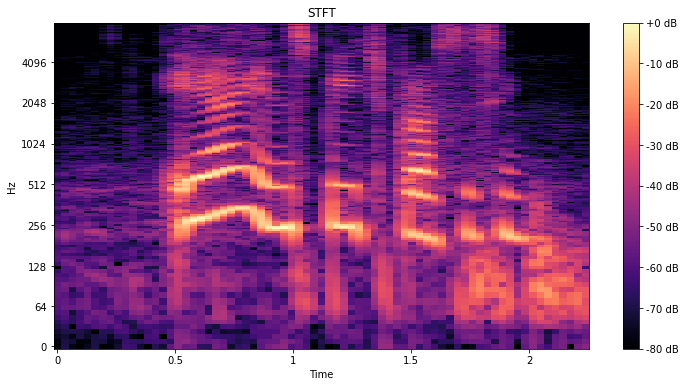

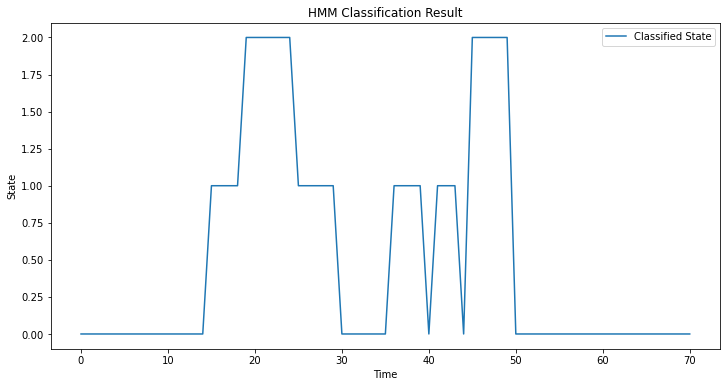

HMM Model Parameters:
Transition Matrix:
[[0.90697674 0.06976744 0.02325581]
 [0.1875     0.75       0.0625    ]
 [0.09090909 0.09090909 0.81818182]]
Means:
[[0.13486788 0.15627485 0.14667782 ... 0.17422279 0.16458336 0.14333415]
 [0.2137706  0.22949073 0.22900195 ... 0.08136324 0.10646697 0.14015835]
 [0.16476699 0.19289138 0.14545893 ... 0.07875885 0.08917739 0.07513557]]
Covariances:
[[[0.02480283 0.         0.         ... 0.         0.         0.        ]
  [0.         0.01884765 0.         ... 0.         0.         0.        ]
  [0.         0.         0.01462712 ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.09410667 0.         0.        ]
  [0.         0.         0.         ... 0.         0.0885668  0.        ]
  [0.         0.         0.         ... 0.         0.         0.07540303]]

 [[0.03538748 0.         0.         ... 0.         0.         0.        ]
  [0.         0.03271992 0.         ... 0.         0.         0.        ]
  [0.     

In [6]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Load audio file function
def load_audio(file_path):
    # Load audio file using librosa
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

# Function to extract Short-Time Fourier Transform (STFT) features
def stft_features(y, sr):
    # Compute STFT magnitude
    stft = np.abs(librosa.stft(y))
    return stft

# Function to train HMM model
def train_hmm(features, n_components=3, n_iter=100):
    # Initialize HMM model
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    # Train the model using input features
    model.fit(features)
    return model

# Function to plot STFT
def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    # Display STFT spectrogram
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

# Function to classify signal using trained HMM
def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

# Main function
def main():
    # Path to audio file
    audio_file_path = r"C:\Users\Vikranth\sem6\speechProcessing\trimmed_audio.wav"
    
    # Load audio
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
